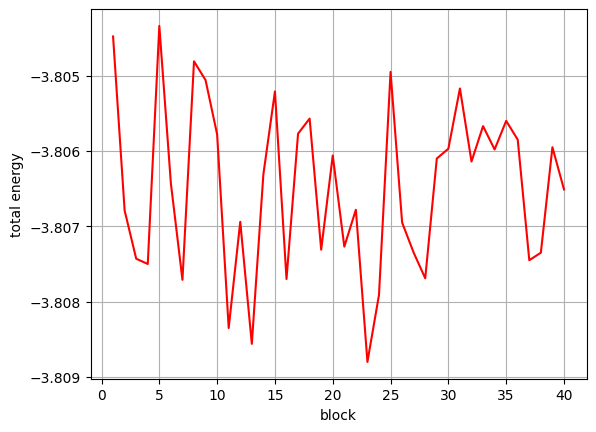

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

tenergy = np.loadtxt("NSL_SIMULATOR/OUTPUT/total_energy.dat")
x = tenergy[:,0]
y = tenergy[:,1]
#err = tenergy[:,3]

plt.figure(1)
plt.plot(x,y, color='red')
plt.xlabel('block')
plt.ylabel('total energy')
plt.grid(True)

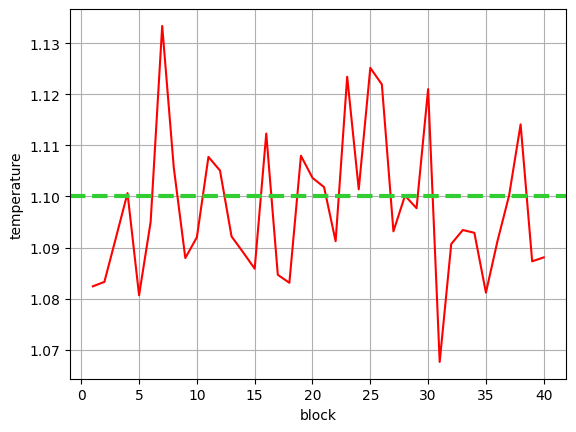

In [17]:
temp = np.loadtxt("NSL_SIMULATOR/OUTPUT/temperature.dat")
x = temp[:,0]
y = temp[:,1]
#err = temp[:500,3]

plt.figure(1)
plt.plot(x,y, color='red')
plt.xlabel('block')
plt.ylabel('temperature')
plt.axhline(y=1.1, color='limegreen', linestyle='--', linewidth = 3, label = 'Expected value')

plt.grid(True)

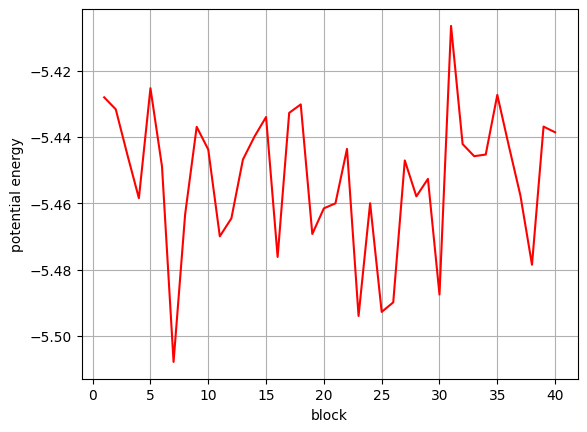

In [18]:
tenergy = np.loadtxt("NSL_SIMULATOR/OUTPUT/potential_energy.dat")
x = tenergy[:,0]
y = tenergy[:,1]
#err = tenergy[:,3]

plt.figure(1)
plt.plot(x,y,color='red')
plt.xlabel('block')
plt.ylabel('potential energy')
plt.grid(True)

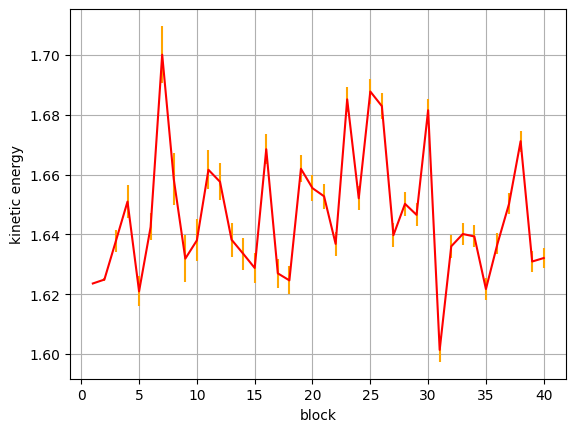

In [19]:
tenergy = np.loadtxt("NSL_SIMULATOR/OUTPUT/kinetic_energy.dat")
x = tenergy[:,0]
y = tenergy[:,1]
err = tenergy[:,3]

plt.figure(1)
plt.errorbar(x,y, err, ecolor= 'orange' ,color='red')
plt.xlabel('block')
plt.ylabel('kinetic energy')
plt.grid(True)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf

In [21]:
potential = np.loadtxt('NSL_SIMULATOR/OUTPUT/potential_energy.dat')
p = potential[:50000,1]

p = np.asarray(p, dtype=float)
t_max = p.size
# Denominatore varianza 
mean_all = p.mean()

denom = (p**2).mean() - mean_all**2
if denom == 0:
    raise ValueError("Denominatore nullo (varianza = 0), autocorrelazione non definita.")

# Costruiamo il vettore di autocorrelazione per lag t = 0,1,...,N-1
chi = np.zeros(t_max)
for t in range(t_max):
    M = t_max - t
    segment1 = p[:M]
    segment2 = p[t:]
    # ⟨m(i)m(i+t)⟩
    avg_prod = np.dot(segment1, segment2) / M
    # ⟨m(i)⟩ e ⟨m(i+t)⟩
    avg1 = segment1.mean()

    avg2 = segment2.mean()
    # valore di χ(t)
    chi[t] = (avg_prod - avg1*avg2) / denom


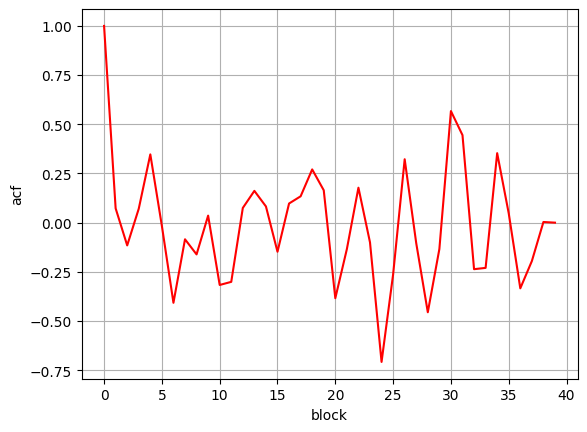

In [22]:
plt.plot(chi[:1000], color='red')
plt.xlabel('block') #ogni block è un timestep
plt.ylabel('acf')
plt.grid(True)

40
0


/tmp/ipykernel_821/4164737516.py:21: RuntimeWarning: invalid value encountered in scalar divide
  s[j] /= L[i]
/tmp/ipykernel_821/4164737516.py:22: RuntimeWarning: invalid value encountered in scalar divide
  s2[j] /= L[i]


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


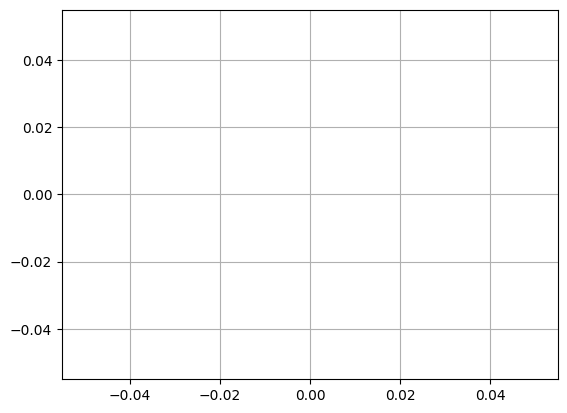

In [26]:
potential = np.loadtxt('NSL_SIMULATOR/OUTPUT/potential_energy.dat')
p = potential[:,1]
M = p.size
print(M)
N=[50000,25000,20000,10000,7500,5000,4000,2500,2000,1000,750,500,400,250,200,100]

L = np.zeros(len(N), dtype = int)
mean = np.zeros(len(N))
mean2 = np.zeros(len(N))

for i in range(len(N)):
    L[i] = int(M/N[i])
    print(L[i])
    s = np.zeros(int(N[i]))
    s2 = np.zeros(int(N[i]))
    var = np.zeros(int(N[i]))
    for j in range(len(s)): #ciclo sui blocchi
        for l in range(L[i]): # ciclo nel blocco per fare la media
            s[j] += p[l+j*L[i]]
            s2[j] += p[l+j*L[i]]**2
        s[j] /= L[i]
        s2[j] /= L[i]
        var[j] = (s2[j]-s[j]**2)
    mean[i] = s.mean()
    mean2[i] = np.sqrt(var.mean()/N[i])


plt.plot(L,mean2)
#plt.errorbar(L[400:], mean[400:], mean2[400:])
plt.grid(True)

Numero totale di dati: 40


/tmp/ipykernel_821/201120269.py:34: RuntimeWarning: invalid value encountered in scalar divide
  s[j] /= block_len
/tmp/ipykernel_821/201120269.py:35: RuntimeWarning: invalid value encountered in scalar divide
  s2[j] /= block_len
/tmp/ipykernel_821/201120269.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


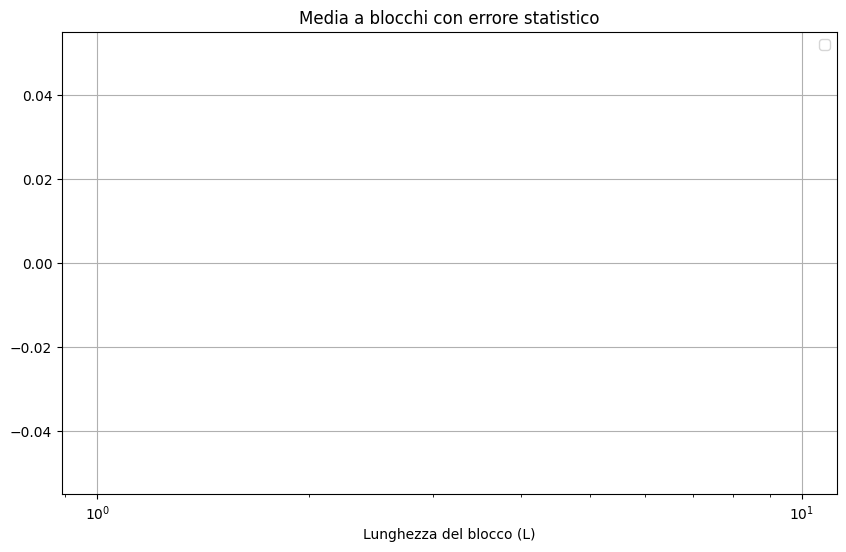

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Caricamento dati
potential = np.loadtxt('NSL_SIMULATOR/OUTPUT/potential_energy.dat')
p = potential[:100000, 1]
M = p.size
print("Numero totale di dati:", M)

# Lista fissa dei numeri di blocchi
N = [50000, 25000, 20000, 10000, 7500, 5000, 4000, 2500, 2000, 1000, 750, 500, 400, 250, 200, 100]
N = np.array(N)

L = (M // N).astype(int)  # Lunghezza di ciascun blocco
mean = np.zeros(len(N))
mean2 = np.zeros(len(N))  # errore quadratico medio

for i in range(len(N)):
    n_blocks = N[i]
    block_len = L[i]

    if n_blocks * block_len > M:
        print(f"Salto N={n_blocks} perché L*N > M")
        continue

    s = np.zeros(n_blocks)
    s2 = np.zeros(n_blocks)

    for j in range(n_blocks):
        for l in range(block_len):
            idx = j * block_len + l
            s[j] += p[idx]
            s2[j] += p[idx] ** 2
        s[j] /= block_len
        s2[j] /= block_len

    mean[i] = np.mean(s)
    mean2[i] = np.mean(s2 - s ** 2) / n_blocks  # errore sulla media

# Plot
plt.figure(figsize=(10, 6))
plt.plot(L,np.sqrt(mean2))
#plt.errorbar(L, mean, yerr=np.sqrt(mean2))
plt.xlabel("Lunghezza del blocco (L)")
plt.xscale('log')
plt.title("Media a blocchi con errore statistico")
plt.grid(True)
plt.legend()
plt.show()


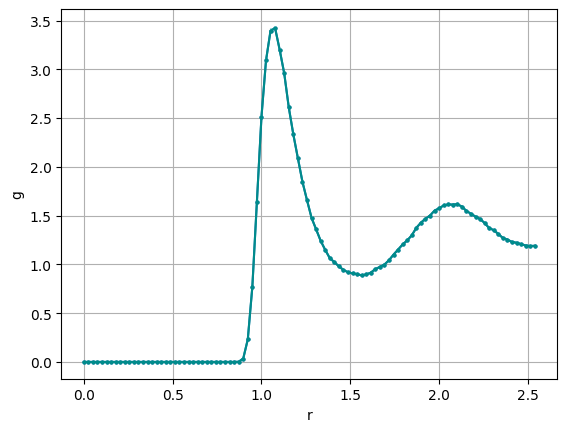

In [32]:
gofr = np.loadtxt("NSL_SIMULATOR/OUTPUT/gofr.dat")
r = gofr[-100:,1]
g = gofr[-100:,2]
err = gofr[-100:,3]
plt.plot(r,g, marker = 'o', markersize = '2')
plt.errorbar(r, g,err, marker = 'o', markersize = '2',color='darkcyan', ecolor='lightblue', label = 'last frame')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)